### This Lab Assignment is done by CS20B1044 Avinash R Changrani

## Question 1

NOTE - Do not use inbuilt functions.

1. Implement the feedforward and backpropagation learning algorithm for multiple perceptrons in Python for the question provided in the attached image:
    * Initialize the weights and biases randomly.
    * Implement the forward pass.
    * Compute the loss between the predicted output and the actual output using an appropriate loss function.
    * Compute the gradients of the loss function with respect to the weights and biases using the chain rule.
    * Update the weights and biases.
    * Iterate over multiple times (epochs), performing forward propagation, loss calculation, backpropagation, and parameter updates in each iteration till convergence.


<center>
  <img src="./Q1.png" alt="Question" style="width: 500px; height: 500px;">
</center>

In [66]:
# import the required modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The Question given has a Neural Network with 2 input nodes, 1 hidden layer with 3 nodes each and an output layer consisiting of 2 output node. It is a 2 layer network and the activation function used is Sigmoid for the output Layer. The Loss function used is Mean Squared Error.

This 2 Layer Neural Network has the following parameters initialized randomly:


1. Weights for the Hidden Layer and Output Layer (For Example)

\begin{align*}
\begin{bmatrix} 
W^1_{01} & W^1_{11} & W^1_{21} \\
W^1_{02} & W^1_{12} & W^1_{22} 
\end{bmatrix} 
= 
\begin{bmatrix}
0.5 & 1.5 & 0.8 \\
0.8 & 0.2 & -1.6 
\end{bmatrix}
\end{align*}


\begin{align*}
\begin{bmatrix}
W^2_{01} & W^2_{11} & W^2_{21} \\
W^2_{02} & W^2_{12} & W^2_{22} 
\end{bmatrix} 
= 
\begin{bmatrix}
0.9 & -1.7 & 1.6 \\
1.2 & 2.1 & -0.2 
\end{bmatrix}
\end{align*}

2. Features and biases for the Hidden Layer and Output Layer (Given)

\begin{align*}
X 
= 
\begin{bmatrix}
1 \\
0.7 \\
1.2 
\end{bmatrix}
\end{align*}

3. The Label for the output Layer is (Given)

\begin{align*}
Y
= 
\begin{bmatrix}
1 \\
0 \\
\end{bmatrix}
\end{align*}


In [67]:
X = np.array([1, 0.7, 1.2])

W1 = np.random.randn(2, 3)

W2 = np.random.randn(2, 3)

Y = np.array([1 , 0])

X = X.reshape(3,1)

Y = Y.reshape(2,1)

In [68]:
# activation function sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#### Forward Pass 

The Forward Pass is done by the following steps:

1. The input is multiplied with the weights and added with the bias for the Hidden Layer and then passed through the activation function to get the output of the Hidden Layer.
2. The output of the Hidden Layer is multiplied with the weights and added with the bias for the Output Layer and then passed through the activation function to get the output of the Output Layer.

The activations from previous layers are used to calculate the activations of the next layer.

The Equation for the Forward Pass is given by:

\begin{align*}
Z_n =  W_n \cdot A_{n-1} + B_n \\
A_n = \sigma(Z_n)
\end{align*}

#### Loss Calculation

The Loss Calculation is done by the following steps:

1. The output of the Output Layer is subtracted from the actual output and then squared to get the Mean Squared Error.

The Equation for the Loss Calculation is given by:

\begin{align*}
Loss = \frac{1}{2} \sum_{i=1}^{n} (Y_i - \hat{Y_i})^2
\end{align*}

#### Backward Pass

The Backward Pass is done by the following steps:

1. The gradients of the Loss function with respect to the weights and biases are calculated using the chain rule.
2. The weights and biases are updated using the gradients.

We use the chain rule to calculate the gradients of the Loss function with respect to the weights and biases.

The Equation for the Backward Pass for the output Layer is given by:

\begin{align*}
\frac{\partial Loss}{\partial W^2} = \frac{\partial Loss}{\partial \hat{Y}} \cdot \frac{\partial \hat{Y}}{\partial Z^2} \cdot \frac{\partial Z^2}{\partial W^2}
\\
\frac{\partial Loss}{\partial \hat{Y}} = \hat{Y} - Y
\\
\frac{\partial \hat{Y}}{\partial Z^2} = \hat{Y} \cdot (1 - \hat{Y})
\\
\frac{\partial Z^2}{\partial W^2} = A^1
\\
\frac{\partial Loss}{\partial W^2} = (\hat{Y} - Y) \cdot \hat{Y} \cdot (1 - \hat{Y}) \cdot A^1

\end{align*}

The Equation for the Backward Pass for the Hidden Layer is given by:

\begin{align*}
\frac{\partial Loss}{\partial W^1} = \frac{\partial Loss}{\partial \hat{Y}} \cdot \frac{\partial \hat{Y}}{\partial Z^2} \cdot \frac{\partial Z^2}{\partial A^1} \cdot \frac{\partial A^1}{\partial Z^1} \cdot \frac{\partial Z^1}{\partial W^1}
\\
\frac{\partial Z^2}{\partial A^1} = W^2
\\
\frac{\partial A^1}{\partial Z^1} = A^1 \cdot (1 - A^1)
\\
\frac{\partial Z^1}{\partial W^1} = X
\\
\frac{\partial Loss}{\partial W^1} = (\hat{Y} - Y) \cdot \hat{Y} \cdot (1 - \hat{Y}) \cdot W^2 \cdot A^1 \cdot (1 - A^1) \cdot X
\end{align*}

#### Iteration

The Iteration is done by the following steps:

1. The Forward Pass is done.
2. The Loss Calculation is done.
3. The Backward Pass is done.
4. The weights and biases are updated.
5. The above steps are repeated till convergence.

In [69]:
# function to calculate the loss (MEAN SQUARED ERROR)
def loss(Y, Y_hat):
    return np.sum((Y - Y_hat) ** 2)

In [70]:
# function to return the derivative of the sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [71]:
# function to Perform an Iteration of Forward and Backward Propagation
# X is a 3x1 matrix, Y is a 2x1 matrix, W1 is a 2x3 matrix, W2 is a 2x3 matrix, and learning_rate is a scalar
def learning(X, Y, W1, W2, learning_rate):
    # Forward Propagation
    # Z1 is a 2x1 matrix
    Z1 = np.dot(W1, X)
    # A1 is a 2x1 matrix
    A1 = sigmoid(Z1)
    # add a bias term
    # A1 is now a 3x1 matrix
    A1 = np.vstack((np.ones((1, A1.shape[1])), A1))
    # W2 is a 2x3 matrix and A1 is a 3x1 matrix
    Z2 = np.dot(W2, A1)
    # A2 is a 2x1 matrix
    A2 = sigmoid(Z2)
    # Backward Propagation
    # Calculate the loss
    L = loss(Y, A2)
    # Calculate the derivative of the loss with respect to A2
    # Y-A2 is a 2x1 matrix and sigmoid_derivative(A2) is a 2x1 matrix and A1.T is a 1x3 matrix
    # dW2 is a 2x3 matrix
    dW2 = np.dot((A2 - Y) * sigmoid_derivative(A2), A1.T)
    # remove the bias term
    # W2_w is a 2x2 matrix
    W2_w = W2[:, 1:].reshape(2,-1)
    # Calculate the derivative of the loss with respect to A1
    # W2_w is a 2x2 matrix, Y-A2 is a 2x1 matrix, sigmoid_derivative(A2) is a 2x1 matrix, sigmoid_derivative(A1[1:]) is 2 x1 matrix and X.T is a 1x3 matrix
    # dW1 is a 2x3 matrix
    dW1 = np.dot(np.dot(W2_w.T, (A2 - Y) * sigmoid_derivative(A2)) * sigmoid_derivative(A1[1:]), X.T)
    # Update the weights
    W2 -= learning_rate * dW2
    W1 -= learning_rate * dW1
    return L, W1, W2, A2


In [72]:
# function to train the model and perform the iterations until we reach Convergence

def train(X, Y, W1, W2, learning_rate, epochs, threshold):
    loss_values = []
    for i in range(epochs):
        L, W1, W2,A2 = learning(X, Y, W1, W2, learning_rate)
        if L < threshold:
            print(f'Convergence achieved at epoch {i + 1}')
            print(f'Epoch {i + 1}: Loss = {L}, W1 = {W1}, W2 = {W2}')
            print(f'Predicted Output: {A2}')
            return i, loss_values
        print(f'Epoch {i + 1}: Loss = {L}, W1 = {W1}, W2 = {W2}')
        loss_values.append(L)
    print(f'Predicted Output: {A2}')
    return epochs, loss_values

In [73]:
# Run the Model for different learning rates and compare the results
learning_rates = [0.01, 0.05,0.1,0.2]

epochs  = []
losses = []
for learning_rate in learning_rates:
    print(f'Running the model for learning rate = {learning_rate}')
    epoch, loss_values = train(X, Y, W1, W2, learning_rate, 1000, 0.001)
    epochs.append(epoch)
    losses.append(loss_values)
    print('')

Running the model for learning rate = 0.01
Epoch 1: Loss = 1.032963783755114, W1 = [[-0.7125627   0.94974047 -0.32196423]
 [ 0.65216981  1.53285228 -0.36611812]], W2 = [[ 1.19312812 -1.11469144 -0.70783377]
 [ 1.75595161  0.33533512  0.5543471 ]]
Epoch 2: Loss = 1.0319282376850722, W1 = [[-0.71299304  0.94943923 -0.32248064]
 [ 0.65178841  1.53258531 -0.3665758 ]], W2 = [[ 1.19417237 -1.11428089 -0.70701566]
 [ 1.75408861  0.33460268  0.55288754]]
Epoch 3: Loss = 1.0308935201109486, W1 = [[-0.71342255  0.94913857 -0.32299605]
 [ 0.65140803  1.53231904 -0.36703226]], W2 = [[ 1.19521512 -1.11387125 -0.70619893]
 [ 1.75222596  0.33387095  0.55142863]]
Epoch 4: Loss = 1.0298596251020358, W1 = [[-0.71385122  0.9488385  -0.32351046]
 [ 0.65102865  1.53205347 -0.36748751]], W2 = [[ 1.19625639 -1.11346251 -0.70538355]
 [ 1.75036367  0.33313991  0.54997034]]
Epoch 5: Loss = 1.0288265467515934, W1 = [[-0.71427906  0.94853901 -0.32402387]
 [ 0.65065028  1.53178862 -0.36794155]], W2 = [[ 1.1972961

Epoch 998: Loss = 0.23534642966658342, W1 = [[-0.89855095  0.81954869 -0.54515013]
 [ 0.59216067  1.49084589 -0.43812909]], W2 = [[ 1.83154678 -0.90953202 -0.22976003]
 [ 0.24414603 -0.14449841 -0.57549521]]
Epoch 999: Loss = 0.2349170702102693, W1 = [[-0.89860706  0.81950942 -0.54521746]
 [ 0.59227195  1.49092378 -0.43799556]], W2 = [[ 1.83196582 -0.90941759 -0.22944486]
 [ 0.24309069 -0.1447866  -0.57628896]]
Epoch 1000: Loss = 0.23448853883022458, W1 = [[-0.89866305  0.81947022 -0.54528465]
 [ 0.59238332  1.49100174 -0.43786191]], W2 = [[ 1.83238459 -0.90930325 -0.22912986]
 [ 0.24203629 -0.14507451 -0.57708207]]
Predicted Output: [[0.80393385]
 [0.4427715 ]]

Running the model for learning rate = 0.05
Epoch 1: Loss = 0.23406083443906936, W1 = [[-0.89894248  0.81927462 -0.54561996]
 [ 0.59294073  1.49139193 -0.43719302]], W2 = [[ 1.8344772  -0.90873193 -0.2275557 ]
 [ 0.23676896 -0.14651257 -0.58104442]]
Epoch 2: Loss = 0.23193124401169632, W1 = [[-0.89921918  0.81908093 -0.54595201

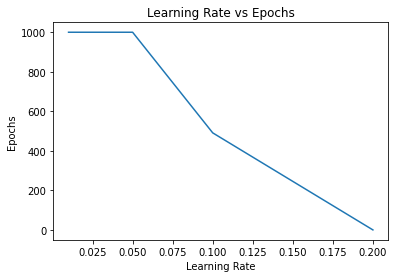

In [74]:
# plot the number of epochs taken from each learning rate to reach convergence
plt.plot(learning_rates, epochs)
plt.xlabel('Learning Rate')
plt.ylabel('Epochs')
plt.title('Learning Rate vs Epochs')
plt.show()

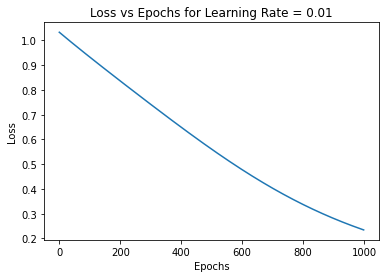

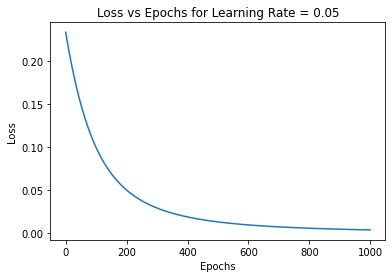

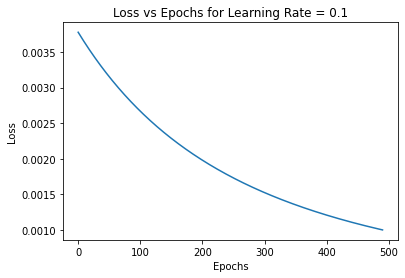

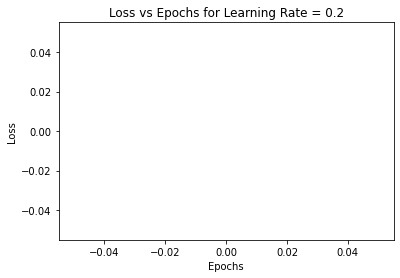

In [75]:
# plot the loss values for each learning rate vs the number of epochs
for i in range(len(learning_rates)):
    plt.plot(range(epochs[i]), losses[i])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss vs Epochs for Learning Rate = {learning_rates[i]}')
    plt.show()